In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

## Download the data

Load the ticker csv

In [2]:
tickers_df = pd.read_csv("ind_nifty500list.csv")
# Yfinance tickers have '.NS' as a suffix for indian stock tickers
tickers_df['Yfinance_tickers'] = tickers_df['Symbol'] + '.NS'
tickers_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code,Yfinance_tickers
0,3M India Ltd.,CONSUMER GOODS,3MINDIA,EQ,INE470A01017,3MINDIA.NS
1,ABB India Ltd.,INDUSTRIAL MANUFACTURING,ABB,EQ,INE117A01022,ABB.NS
2,ABB Power Products and Systems India Ltd.,INDUSTRIAL MANUFACTURING,POWERINDIA,EQ,INE07Y701011,POWERINDIA.NS
3,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025,ACC.NS
4,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,AIAENG,EQ,INE212H01026,AIAENG.NS


Download data from yahoo finance using the yfinance library

In [3]:
nifty500_instruments_list = tickers_df['Yfinance_tickers'].tolist()

yf_data = yf.download(
    tickers = nifty500_instruments_list,
    period = "15y",
    interval = "1d",
    prepost = True)

# Filter out the data to retain only Close from 2009 upto 2020
start = yf_data.index.searchsorted(datetime(2009, 1, 1))
end = yf_data.index.searchsorted(datetime(2019, 12, 31))
data = yf_data["Close"].iloc[start:end+1].copy()

# Resample the data to a yearly timescale
data = data.resample('1Y').last()
data

[*********************100%***********************]  501 of 501 completed


,3MINDIA.NS,AARTIDRUGS.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ADANIENT.NS,...,WELCORP.NS,WELSPUNIND.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,WOCKPHARMA.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,1848.099976,13.275000,11.445028,NaN,757.049988,269.649994,NaN,NaN,837.400024,64.015297,...,262.149994,9.260000,NaN,NaN,152.707993,162.699997,51.820000,125.174004,32.075001,262.600006
2010-12-31,3641.350098,18.549999,15.636678,NaN,795.849976,1310.199951,NaN,NaN,1075.599976,99.613503,...,169.550003,5.990000,NaN,285.100006,184.218994,366.049988,62.560001,147.250000,33.540001,589.700012
2011-12-31,3544.050049,9.281250,11.420728,NaN,583.299988,1460.900024,NaN,NaN,1136.900024,45.001598,...,84.099998,2.470000,NaN,156.899994,149.511993,276.450012,47.759998,117.849998,28.500000,385.399994
2012-12-31,4061.550049,26.056250,24.542418,NaN,700.750000,1482.500000,NaN,NaN,1432.199951,41.591202,...,106.400002,6.170000,NaN,264.799988,147.938004,1572.750000,92.809998,220.699997,56.200001,501.250000
2013-12-31,3650.000000,28.068750,24.068579,NaN,693.299988,1686.550049,NaN,89.650002,1108.750000,40.234699,...,63.500000,7.500000,NaN,212.600006,209.699997,452.649994,74.040001,276.600006,71.309998,545.549988
2014-12-31,6450.049805,106.762497,61.270996,NaN,1288.300049,3804.399902,NaN,120.150002,1400.150024,74.537697,...,68.949997,32.959999,NaN,649.599976,208.199997,1010.150024,154.410004,380.750000,120.879997,816.549988
2015-12-31,11397.549805,148.824997,127.110283,NaN,1114.500000,6010.750000,NaN,231.300003,1360.650024,45.444801,...,115.349998,91.285004,NaN,649.250000,209.962997,1528.699951,145.160004,437.250000,217.889999,863.900024
2016-12-31,11123.099609,151.412506,166.438904,NaN,1043.750000,4722.299805,NaN,138.050003,1331.050049,41.712200,...,75.250000,66.849998,NaN,889.049988,177.919006,657.750000,231.289993,453.049988,190.000000,866.150024
2017-12-31,19126.449219,160.324997,275.531158,NaN,1402.900024,5524.950195,184.149994,172.449997,1758.400024,90.644302,...,135.750000,71.400002,NaN,1592.699951,235.688004,931.349976,315.149994,581.799988,178.110001,1043.199951


In [4]:
# do the same for Nifty50 data
yf_data_nifty50 = yf.download(
    tickers = '^NSEI',
    period = "15y",
    interval = "1d",
    prepost = True)
start_nifty50 = yf_data_nifty50.index.searchsorted(datetime(2009, 1, 1))
end_nifty50 = yf_data_nifty50.index.searchsorted(datetime(2019, 12, 31))
nifty50_data = yf_data_nifty50[["Close"]].iloc[start_nifty50:end_nifty50+1].copy()
nifty50_data = nifty50_data.resample('1Y').last()
nifty50_data

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2009-12-31,4985.850098
2010-12-31,6134.500000
2011-12-31,4624.299805
2012-12-31,5905.100098
2013-12-31,6304.000000
2014-12-31,8282.700195
2015-12-31,7946.350098
2016-12-31,8185.799805
2017-12-31,10530.700195


## Monkey Portfolio Functions

In [5]:
def monkey_portfolio_function(data, nifty50_data=None, starting_amount=100, portfolio_size=20):
    portfolio_value = [starting_amount]
    portfolio_stocks = [None]
    nifty_value = [starting_amount]

    # Loop for 10 years
    for i in range(len(data)-1):
        # Eliminate non-existent stocks for that year
        df = data.iloc[i:i+2].dropna(axis=1, inplace=False)

        # Randomly select the stocks to form the portfolio
        df = df.sample(n=portfolio_size, axis=1, replace=False)
        portfolio_stocks.append(list(df.columns))

        # Calculate and store the portfolio returns
        pc = df.pct_change().iloc[1]
        amount_invested_per_stock = portfolio_value[-1] / portfolio_size
        portfolio_value.append((amount_invested_per_stock * (1 + pc)).sum())
        
        # Repeat for nifty50
        if nifty50_data is not None:
            nifty_df = nifty50_data.iloc[i:i+2]
            pc_nifty = nifty_df.pct_change().iloc[1]
            amount_invested = nifty_value[-1]
            nifty_value.append((amount_invested * (1 + pc_nifty)).sum())

    return_dict = {
        'Year': list(data.index),
        'Stocks': portfolio_stocks,
        'MonkeyPortfolio Value': portfolio_value}
    if nifty50_data is not None:
        return_dict['Nifty50'] = nifty_value

    return pd.DataFrame(return_dict).set_index('Year')

## Comparison with Nifty50

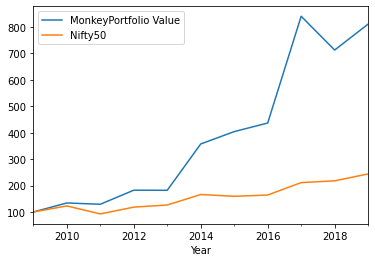

In [6]:
portfolio_size = 30
starting_amount = 100

monkey_portfolio = monkey_portfolio_function(data, nifty50_data, starting_amount, portfolio_size)
monkey_portfolio.plot(y=["MonkeyPortfolio Value", "Nifty50"]);

In [7]:
nifty50_portfolio_final_value = monkey_portfolio["Nifty50"][-1]
nifty50_returns = 100*(nifty50_portfolio_final_value - starting_amount)/starting_amount
print("Nifty50 portfolio returns (%) =", nifty50_returns)

Nifty50 portfolio returns (%) = 144.05968805665955


### Running the experiment 100x 

In [8]:
returns = []
for i in range(100):
    monkey_portfolio = monkey_portfolio_function(data, nifty50_data, starting_amount, portfolio_size)
    final_portfolio_value = monkey_portfolio["MonkeyPortfolio Value"][-1]
    # Get percentage returns from initial investment
    returns.append(100*(final_portfolio_value - starting_amount)/starting_amount)

In [9]:
print("Maximum returns (%) =", max(returns))
print("Minimum returns (%) =", min(returns))
print("Average returns (%) =", np.mean(returns))

Maximum returns (%) = 1110.5367654284996
Minimum returns (%) = 236.79559701269073
Average returns (%) = 599.6992610232261


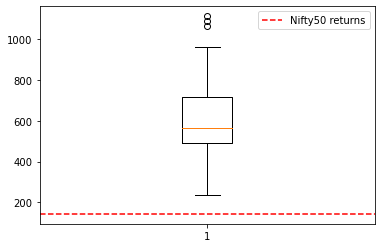

In [10]:
plt.boxplot(returns);
plt.hlines(nifty50_returns, 0.5, 1.5, 'r', 'dashed', label = 'Nifty50 returns');
plt.legend();